# **Song Genre - Multi-Class Classification**

---

## **Introduction**

In this notebook, I will be working on a multi-class classification problem. The dataset that I will be using is a collection of about 30000 songs from spotify. Each song has 23 columns, including the genre of the song. The dataset can be found [here](https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs).

**The goal of this notebook is to predict the genre of a song based on the given features.**


## **Table of Contents**

1. [Importing Libraries and Data](#1.-Importing-Libraries-and-Data)
2. [Exploratory Data Analysis](#2.-Exploratory-Data-Analysis)
3. [Data Preprocessing](#3.-Data-Preprocessing)  
   3.1 [Dropping Columns & Missing Values](#3.1-Dropping-Columns-&-Missing-Values)  
   3.2 [Distribution and Outliers](#3.2-Distribution-and-Outliers)  
   3.3 [Scaling Numerical Columns](#3.3-Scaling-Numerical-Columns)  
   3.4 [Seperating Features and Target Variable + One-Hot Encoding](#3.4-Seperating-Features-and-Target-Variable-+-One-Hot-Encoding)
4. [Building the Model](#4.-Building-the-Model)  
   4.1 [Trying Different Models](#4.1-Trying-Different-Models)  
   4.2 [Hyperparameter Tuning](#4.2-Hyperparameter-Tuning)  
   4.3 [Recursive Feature Elimination](#4.3-Recursive-Feature-Elimination)
5. [Conclusion](#5.-Conclusion)


## **1. Importing Libraries and Data**

---


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler  
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


df = pd.read_csv('data/spotify_songs.csv')
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


## **2. Exploratory Data Analysis**

[Back to top](#Table-of-Contents)

---


In [3]:
df.shape

(32833, 23)

As we can see, the dataset has 32833 rows and 23 columns. The columns are as follows:


In [4]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [6]:
df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

There are barely any missing values in the dataset. The only columns with missing values are track_name and track_artist. Since there are only 15 total missing values, I will drop these rows from the dataset later.


In [7]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


We can see that the columns have different scales. Meaning we'll have to scale the data before training the model.


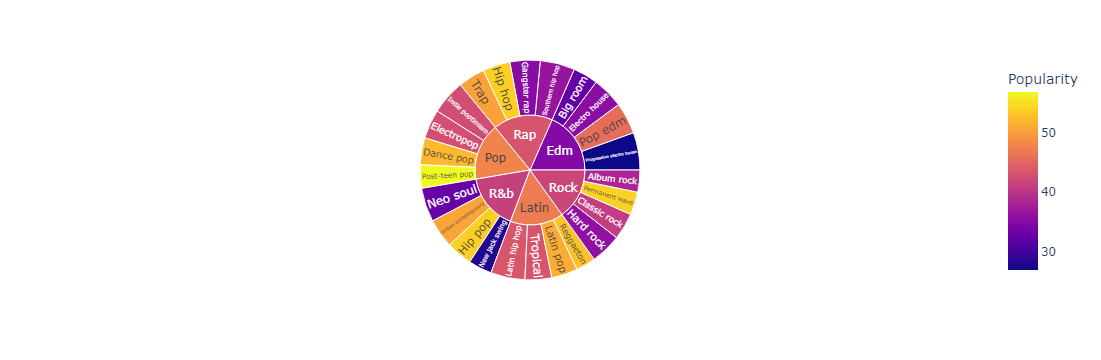

In [8]:
df[['playlist_genre', 'playlist_subgenre']] = df[['playlist_genre', 'playlist_subgenre']] \
                                                  .apply(lambda x: x.str.capitalize(), axis=1)
fig = px.sunburst(df,
                  path=['playlist_genre', 'playlist_subgenre'], 
                  color='track_popularity', 
                  labels={'track_popularity': 'Popularity'})
fig.show()

When looking at the target variable, we can see there are 6 unique genres. These genres have sub-genres as well.


## **3. Data Preprocessing**

[Back to top](#Table-of-Contents)

---


#### **3.1 Dropping Columns & Missing Values**

I will start by dropping the columns that are not needed. After that, I will drop the rows with missing values.


In [9]:
df.drop(['track_id', 'track_album_id', 'track_album_release_date', 'playlist_id', 'track_name', 'track_artist', 'track_album_name', 'playlist_name', 'playlist_subgenre'], axis=1, inplace=True)
df.head()

,track_popularity,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,66,Pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,67,Pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,70,Pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,60,Pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,69,Pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


I have chosen to drop the playlist_subgenre column. Because I think it will be too difficult to predict the sub-genre of a song. I will only focus on predicting the genre of a song.


In [10]:
df.dropna(inplace=True)
df.isnull().sum()

track_popularity    0
playlist_genre      0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
dtype: int64

#### **3.2 Distribution and Outliers**


In [11]:
categorical = df.select_dtypes(include='object').columns
numerical = df.select_dtypes(exclude='object').columns
print(f'Categorical columns: {categorical}')
print(f'Numerical columns: {numerical}')

Categorical columns: Index(['playlist_genre'], dtype='object')
Numerical columns: Index(['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms'],
      dtype='object')


I'm seperating the numerical and categorical columns for convenience.


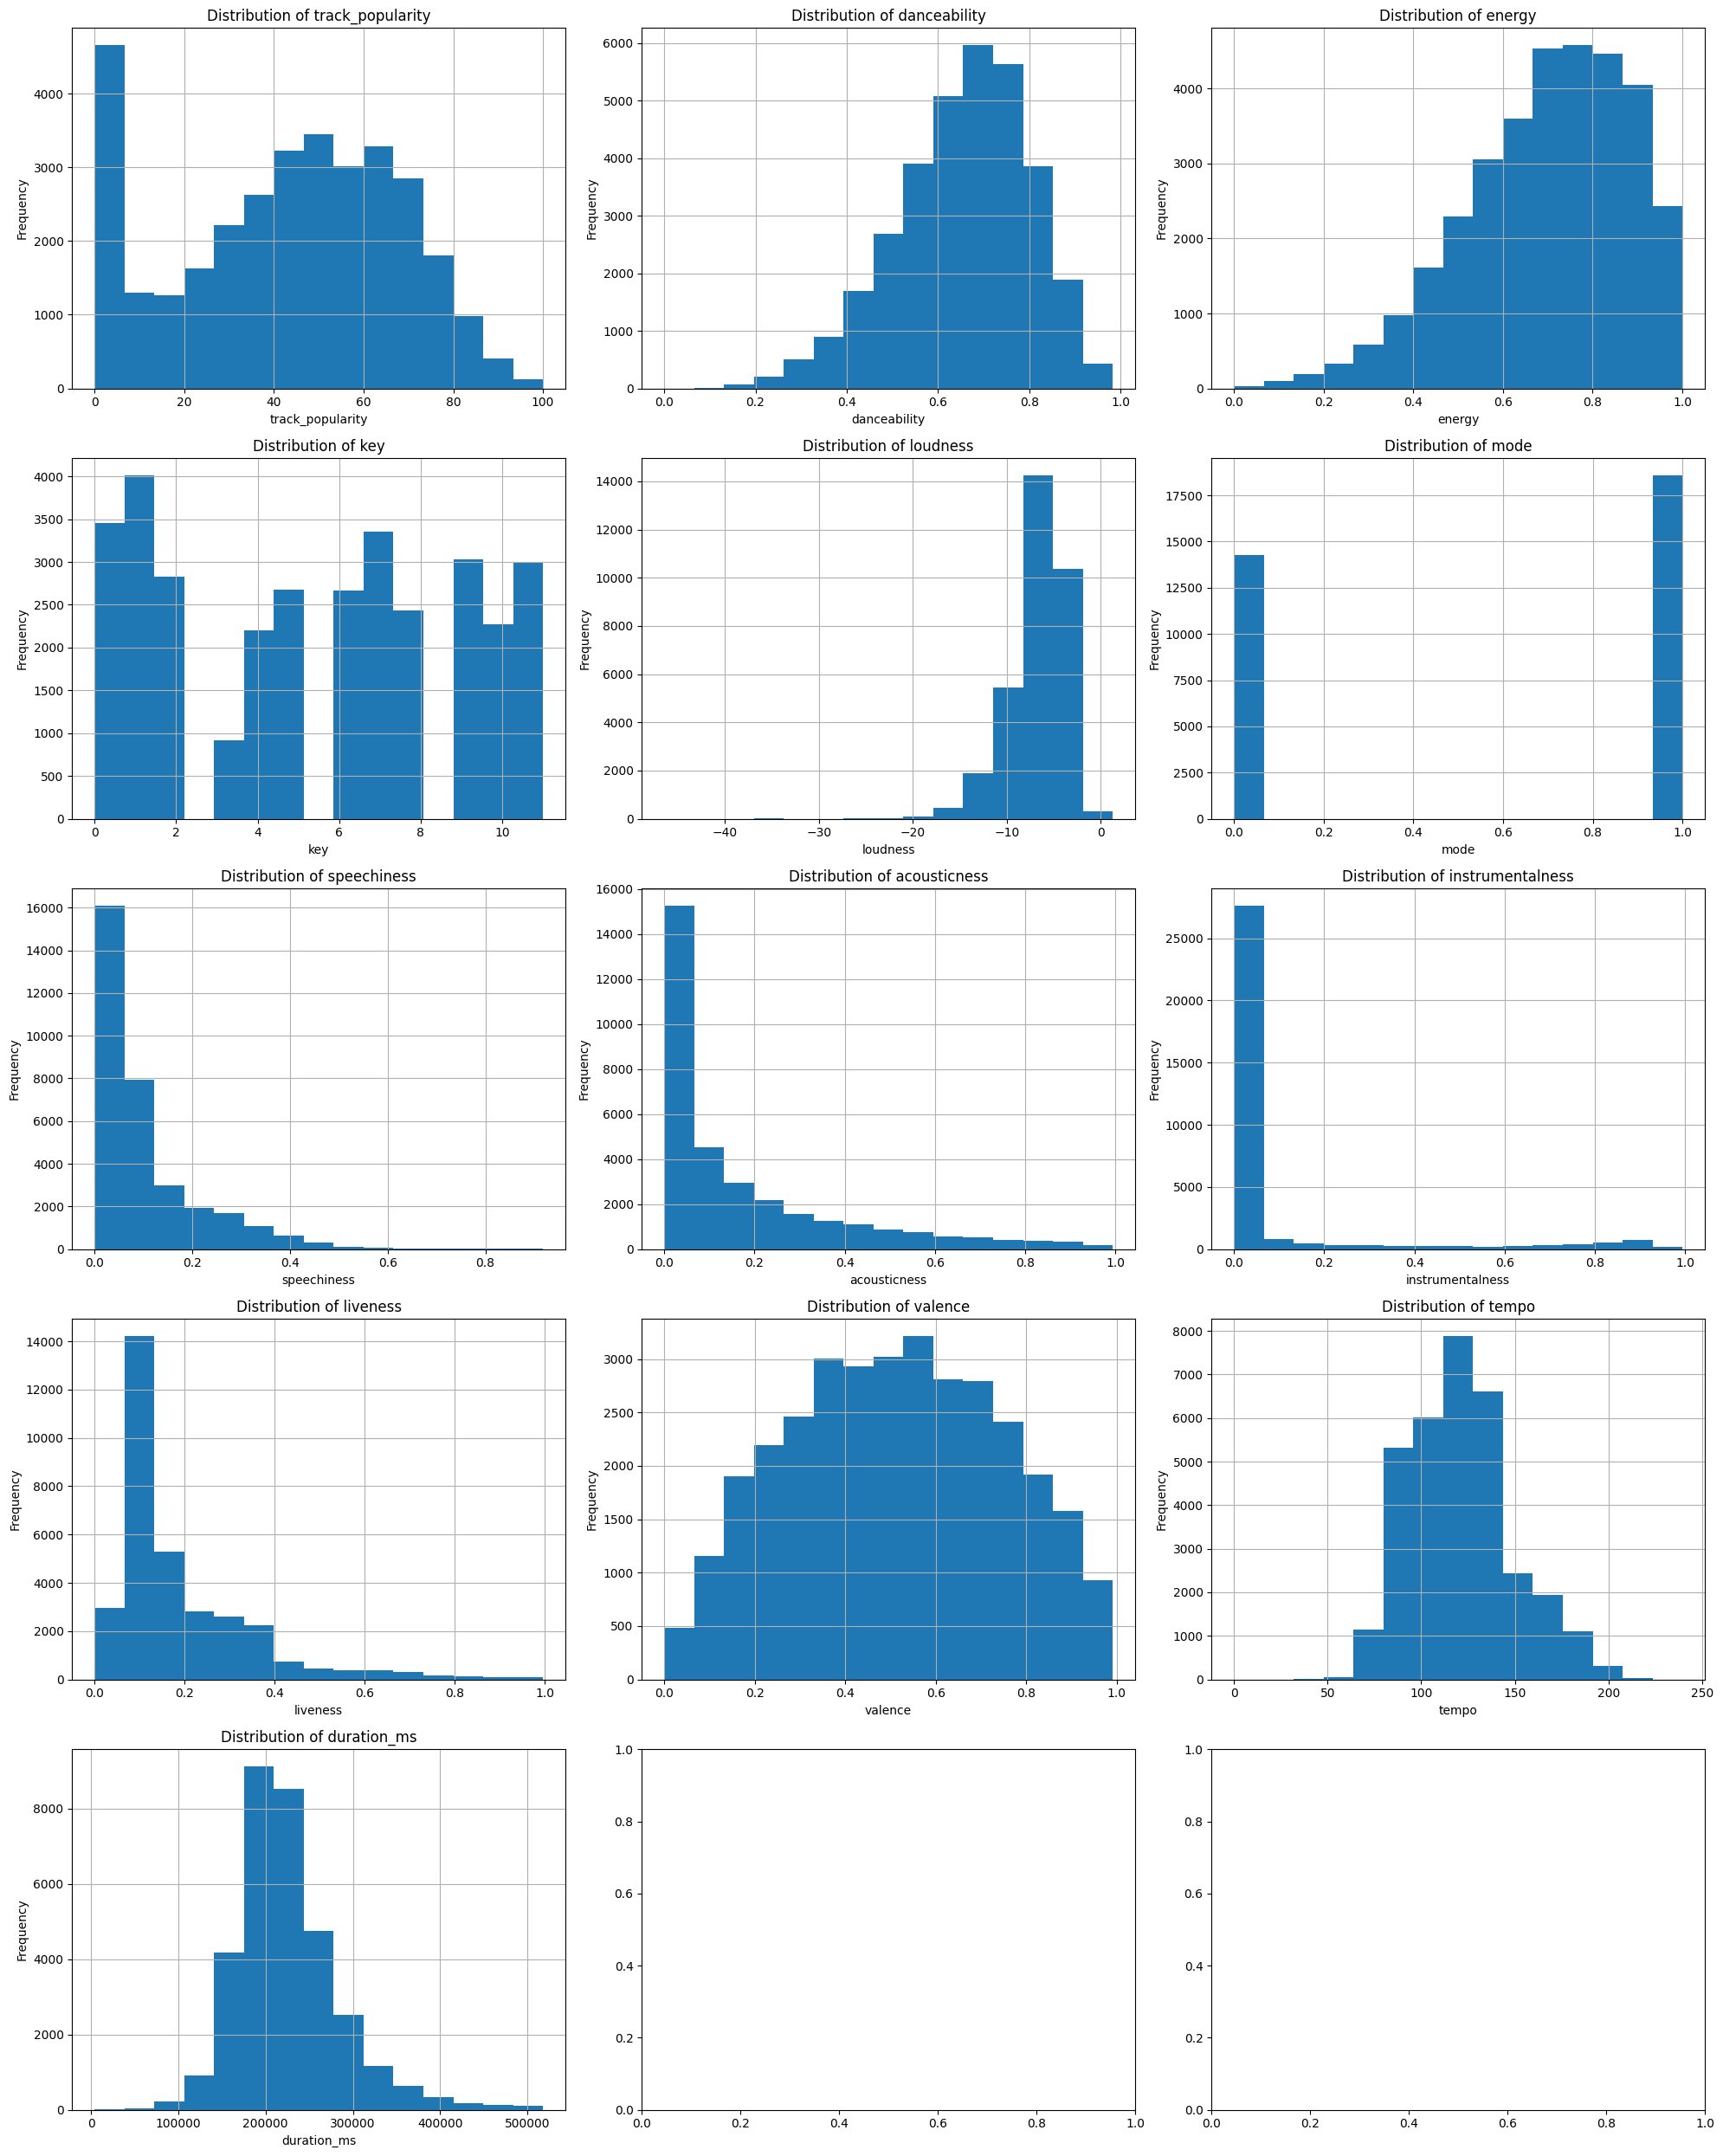

In [12]:
num_cols = len(numerical)
num_rows = num_cols // 3 + (num_cols % 3 > 0)

fig, axs = plt.subplots(num_rows, 3, figsize=(20, num_rows*5))

for i, col in enumerate(numerical): # enumerate() returns the index and the value of the column
    row_idx = i // 3
    col_idx = i % 3
    axs[row_idx, col_idx].hist(df[col], bins=15)
    axs[row_idx, col_idx].set_title(f'Distribution of {col}')
    axs[row_idx, col_idx].set_xlabel(col)
    axs[row_idx, col_idx].set_ylabel('Frequency')
    axs[row_idx, col_idx].grid(True)

plt.tight_layout()
plt.show()

Looking at the distribution of the numerical columns we can see that there are some extremely skewed columns. I've previously tried to remove the outliers from these columns, but this didn't improve the model (Removes 11k rows). Therefore, I will leave the columns as they are.


#### **3.3 Scaling Numerical Columns**

Now that the categorical columns are encoded, I will scale the numerical columns using the RobustScaler. As I have not removed the outliers, using the RobustScaler is the better option.


In [13]:
scaler = RobustScaler()
df[numerical] = scaler.fit_transform(df[numerical])
df.head()

,track_popularity,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.552632,Pop,0.383838,0.752896,0.000000,1.001702,0.0,-0.046154,0.090038,-0.003333,-0.397296,0.016575,0.001531,-0.323054
1,0.578947,Pop,0.272727,0.362934,0.714286,0.339478,0.0,-0.276923,-0.033347,0.868302,1.481005,0.500000,-0.648212,-0.811970
2,0.657895,Pop,0.015152,0.810811,-0.714286,0.775383,-1.0,0.128571,-0.004168,0.001491,-0.109466,0.279006,0.059603,-0.598850
3,0.394737,Pop,0.232323,0.806950,0.142857,0.677255,0.0,0.434066,-0.215506,-0.001381,0.495815,-0.649171,-0.000825,-0.713241
4,0.631579,Pop,-0.111111,0.432432,-0.714286,0.423710,0.0,-0.292308,-0.000417,-0.003333,-0.281391,0.588398,0.058661,-0.409756


#### **3.4 Seperating Features and Target Variable + One-Hot Encoding**


In [14]:
X = df.drop(['playlist_genre'], axis=1)
y = df['playlist_genre']

Now that the target column is seperated from the features, I will one-hot encode the target column.


In [15]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([2, 2, 2, ..., 0, 0, 0])

## **4. Building the Model**

[Back to top](#Table-of-Contents)

---

It's time to build the model. I will start by splitting the data into a training and test set. After that, I will build three different models and compare their performance. The models that I will use are:

1. Decision Tree
2. Random Forest
3. Naive Bayes


#### **4.1 Trying Different Models**


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    scores = cross_val_score(model, X, y, cv=5)
 
    print(f'{name} accuracy: {accuracy}')
    print(f'{name} cross-validation scores: {scores}')
    print(f'{name} cross-validation mean score: {scores.mean()}\n')


Decision Tree accuracy: 0.4391655245926603
Decision Tree cross-validation scores: [0.37642759 0.43642455 0.42211055 0.42354554 0.40191898]
Decision Tree cross-validation mean score: 0.4120854412825998

Random Forest accuracy: 0.5583980508603624
Random Forest cross-validation scores: [0.46505254 0.5360134  0.53890665 0.54279622 0.51294548]
Random Forest cross-validation mean score: 0.5191428579777575

Gaussian Naive Bayes accuracy: 0.4476930105070809
Gaussian Naive Bayes cross-validation scores: [0.38465053 0.42591747 0.42013096 0.41486445 0.43192202]
Gaussian Naive Bayes cross-validation mean score: 0.4154970850152516



While Random Forest has the highest accuracy, the scores are not that high. I will try to improve the model by tuning the hyperparameters of the Random Forest model.


#### **4.2 Hyperparameter Tuning**


In [17]:
param_distributions = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier()
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, 
                                   n_iter=10, cv=5, n_jobs=-1, verbose=2)
random_search.fit(X_train, y_train)

random_search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 150,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_depth': 20}

I have used RandomizedSearchCV to tune the hyperparameters of the Random Forest model. RandomizedSearchCV is a method that searches for the best hyperparameters by sampling from a distribution of hyperparameters. GridSearchCV could also be used, it however takes too long to run.


In [18]:
rf = RandomForestClassifier(**random_search.best_params_)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'Random Forest accuracy: {accuracy}')
print(f'Random Forest cross-validation scores: {cross_val_score(rf, X, y, cv=5)}')
print(f'Random Forest cross-validation mean score: {cross_val_score(rf, X, y, cv=5).mean()}')

Random Forest accuracy: 0.5643368356936196
Random Forest cross-validation scores: [0.46931628 0.53388153 0.5529161  0.54995431 0.52177886]
Random Forest cross-validation mean score: 0.5248078650945865


The accuracy of the Random Forest model has improved from 51.9% to 52.6% after tuning the hyperparameters. This is still not a great score, but it's slightly better than before.


#### **4.3 Recursive Feature Elimination**


Let's see if I can improve the model by selecting the best features. I will use Recursive Feature Elimination for this.

> Recursive Feature Elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached.


In [19]:
rfe = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=7)
rfe.fit(X, y)

X.columns[rfe.support_]

X = X[X.columns[rfe.support_]]
X.head()

,danceability,energy,speechiness,acousticness,valence,tempo,duration_ms
0,0.383838,0.752896,-0.046154,0.090038,0.016575,0.001531,-0.323054
1,0.272727,0.362934,-0.276923,-0.033347,0.500000,-0.648212,-0.811970
2,0.015152,0.810811,0.128571,-0.004168,0.279006,0.059603,-0.598850
3,0.232323,0.806950,0.434066,-0.215506,-0.649171,-0.000825,-0.713241
4,-0.111111,0.432432,-0.292308,-0.000417,0.588398,0.058661,-0.409756


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    scores = cross_val_score(model, X, y, cv=5)
 
    print(f'{name} accuracy: {accuracy}')
    print(f'{name} cross-validation scores: {scores}')
    print(f'{name} cross-validation mean score: {scores.mean()}\n')

Decision Tree accuracy: 0.42835389066544843
Decision Tree cross-validation scores: [0.37795036 0.42256738 0.41830364 0.43070362 0.39780688]
Decision Tree cross-validation mean score: 0.40946637766129684

Random Forest accuracy: 0.5358611238008223
Random Forest cross-validation scores: [0.45957058 0.51667428 0.52474494 0.53837953 0.50609199]
Random Forest cross-validation mean score: 0.5090922634846946

Gaussian Naive Bayes accuracy: 0.42348104157149385
Gaussian Naive Bayes cross-validation scores: [0.37399117 0.41967413 0.42104462 0.42750533 0.41593055]
Gaussian Naive Bayes cross-validation mean score: 0.4116291590035576



Sadly, the scores have not improved after selecting the best features. I've tried a a wide range of features, none of them improved the model.


## **5. Conclusion**

[Back to top](#Table-of-Contents)

---

In this notebook, I tackled a multi-class classification problem aimed at predicting the genre of songs based on various features. The dataset comprised approximately 30,000 songs from Spotify, with 23 columns including the target variable, playlist_genre.

After an initial exploratory data analysis (EDA), I performed data preprocessing steps, including dropping irrelevant columns, handling missing values, and scaling numerical features using RobustScaler. I also encoded categorical variables and prepared the data for modeling.

I used three different classification models: Decision Tree, Random Forest, and Gaussian Naive Bayes. Despite tuning the hyperparameters of the Random Forest model using RandomizedSearchCV, the model's accuracy remained mediocre. I also tried to use Recursive Feature Elimination (RFE) to select the most informative features. However, even after selecting the best features, the model's accuracy actually decreased.

In conclusion, the best model I've built is the Random Forest model with an accuracy of 52.6%. This is not a great score. My guess is that the dataset is too complex to predict the genre of a song based on the given features. It could also be that the features are not informative enough to predict the genre of a song.
